- KEYWORDS: mechanism, rate law determination, active intermediate


![img](//s-media-cache-ak0.pinimg.com/564x/97/78/16/977816997b9c5ffb69419311c9ad94c8.jpg)

This is what it might have been like had Einstein been in reaction engineering&#x2026;

# Application to enzyme kinetics

-   Enzymes are catalysts that speed up the rates of reactions
-   The overall reactions are typically $S \rightarrow P$
    -   We refer to the reactants as *substrates* by convention
-   Enzyme kinetics often show first order kinetics at low concentration of substrate, and zeroth order kinetics at high concentration of substrate
-   Let us propose a mechansim that accounts for this behavior
-   We will assume the substrate can bind reversibly with the enzyme to form an enzyme-substrate complex
-   The enzyme-substrate complex can react further to form products

\begin{align*}
E + S \rightarrow E\cdot S \\
E\cdot S \rightarrow E + S \\
E\cdot S \rightarrow P + E
\end{align*}

-   Now, let us assume that $E\cdot S$ is an active intermediate

$ r_{E\cdot S} = 0 = k_1 [E][S] - k_2 [E\cdot S] - k_3 [E\cdot S]  $

-   Solving for $[E\cdot S]$ yields

$ [E\cdot S] = \frac{k_1 [E][S]}{k_2 + k_3} $

-   This eliminates the hard to detect enzyme-substrate concentration
-   However, it is also difficult to measure the concentration of *free* enzyme $[E]$
    -   We usually cannot tell the difference between $[E]$ and $[E\cdot S]$
    -   We usually do know the total enzyme concentration $[E_t] = [E] + [E\cdot S]$

$ [E_t] = [E] + \frac{k_1 [E][S]}{k_2 + k_3}  $

-   We can solve that equation for $[E]$

$ [E] = \frac{[E_t](k_2 + k_3)}{k_2 + k_3 + k_1[S]} $

-   Finally, we can write the rate law for production of products:

\begin{align}
r_P &=& k_3 [E\cdot S] \\
    &=& \frac{k_3 k_1 [E][S]}{k_2 + k_3} \\
    &=& \frac{k_1 k_3 [E_t][S]}{k_1 [S] + k_2 + k_3}
\end{align}

-   You can see from this rate law that if $k_1[S] \gg k_2 + k_3$ then the overall rate will be practically independent of $[S]$
    -   In other words, the rate will be zeroth order in $[S]$
    -   That happens because the enzyme is completely saturated with substrate
    -   Thus, the rate is determined by the rate of product formation
-   On the other hand, if $k_1[S] \ll k_2 + k_3$ then the rate of product formation will be approximately first order in $[S]$
-   The rate depends on the *total enzyme concentration*

**exercise** Derive a rate law for enzyme kinetics if there is an inhibition reaction. For example:

\begin{align*}
E + S \rightarrow E\cdot S \\
E\cdot S \rightarrow E + S \\
E\cdot S \rightarrow E + P \\
I + E  \rightarrow E\cdot I\\
E\cdot I \rightarrow I + E
\end{align*}

$ r_P = \frac {k_3 E_t [S]}{[S] + (k_2 + k_3)/k_1 (1 + k_4 / k_5 [I])} $

## Model discrimination by data regression

It is typical that many models can be derived that may be similar, and we have to use data analysis to determine which one is best.
This data was obtained for cell growth where $C_c$ is the cell concentration, and $C_s$ is the concentration of "substrate", i.e. cell food.

In [1]:
import numpy as np

t = np.array([0, 1, 2, 3, 4, 6, 8]) # hour
Cc = np.array([1, 1.39, 1.93, 2.66, 3.7, 7.12, 13.7]) # g / L
Cs = np.array([250, 245, 238, 229, 216, 197, 94.4]) # g / L

rg = np.array([0.3, 0.45, 0.63, 0.87, 1.21, 2.32, 4.42]) # g / L / hr

There are many models that have been developed to describe cell growth. We can see that the concentration of cells increases with time, and the concentration of substrate decreases, i.e. it is consumed. We will consider three models:

1.  The Monod equation: $r_g = \frac{\mu_{max} C_S C_C}{K_s + C_S}$
2.  The Tessier equation: $\mu_{max} [1 - \exp(-Cs/k)] C_c$.
3.  

First, we consider the Monod equation: $r_g = \frac{\mu_{max} C_S C_C}{K_s + C_S}$. Our goal is to fine the parameters.

[[ 0.32157937  0.33529714]
 [-0.59834768  3.98704144]]
The SSE for f1 is 0.0007275731447540712


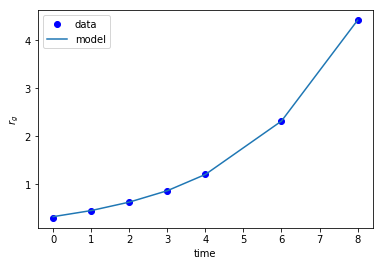

In [2]:
from pycse import nlinfit
%matplotlib inline
import matplotlib.pyplot as plt

def f1(C, umax, Ks):
    Cc, Cs = C
    return umax * Cs * Cc / (Ks + Cs)

p1, pint1, se1 = nlinfit(f1, [Cc, Cs], rg, p0=[0.3, 2], alpha=0.05)
print(pint1)
SSE = sum((rg - f1([Cc, Cs], *p1))**2)
print('The SSE for f1 is {}'.format(SSE))

umax, Ks = p1
plt.plot(t, rg, 'bo', t, f1([Cc, Cs], *p1))
plt.xlabel('time')
plt.ylabel('$r_g$')
plt.legend(['data', 'model'])

The fit looks good, but the confidence interval on Ks is large, and suggests other models might fit the data better.

The second model to consider is the Tessier equation: $r_g = \mu_{max} [1 - \exp(-Cs/k)] C_c$.

[  0.32582022  20.40748937]
[[  0.32232389   0.32931655]
 [ 14.69653263  26.11844611]]
The SSE for f2 is 0.0007077090258808744


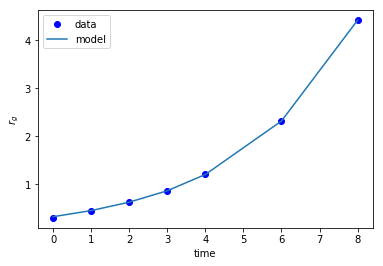

In [3]:
def f2(C, umax, k):
    Cc, Cs = C
    return umax * (1 - np.exp(-Cs / k)) * Cc

p2, pint2, se2 = nlinfit(f2, [Cc, Cs], rg, p0=[0.3, 20], alpha=0.05)
print(p2)
print(pint2)

SSE = sum((rg - f2([Cc, Cs], *p2))**2)
print('The SSE for f2 is {}'.format(SSE))

plt.plot(t, rg, 'bo', t, f2([Cc, Cs], *p2))
plt.xlabel('time')
plt.ylabel('$r_g$')
plt.legend(['data', 'model'])

This fit is a little better than the first one, by SSE, and the SSE is a little smaller.

Finally, the Moser equation: $r_g = \frac{\mu_{max} C_c}{1 + k C_s^{-\lambda}}$.

[  3.23561832e-01   7.18010143e+03   1.20673186e+01] 0.323561832392
[[-inf  inf]
 [-inf  inf]
 [-inf  inf]]
The SSE for f3 is 0.0012645995026466387


/Users/jkitchin/anaconda3/lib/python3.5/site-packages/scipy/optimize/minpack.py:715: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


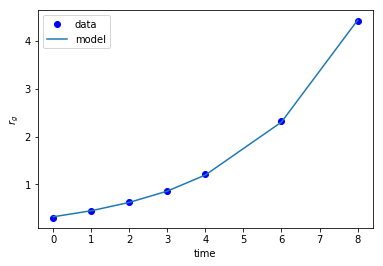

In [11]:
def f3(C, umax, k, _lambda):
    Cc, Cs = C
    return umax * Cc / (1 + k * Cs**(-_lambda))

p3, pint3, se3 = nlinfit(f3, [Cc, Cs], rg, p0=[0.3, 162., 2], alpha=0.05)
print(p3, p3[0])
print(pint3)

SSE = sum((rg - f3([Cc, Cs], *p3))**2)
print('The SSE for f3 is {}'.format(SSE))

plt.plot(t, rg, 'bo', t, f3([Cc, Cs], *p3))
plt.xlabel('time')
plt.ylabel('$r_g$')
plt.legend(['data', 'model'])

Note that the confidence intervals are not well defined here. Let's look at one parameter to see why: &lambda;. We will plot the sum squared error as a function of &lambda;. We should see a minimum, but, we do not.

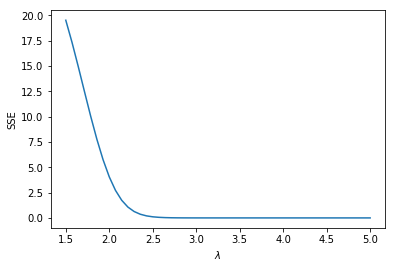

In [1]:
umax, k, _ = p3
_L = np.linspace(1.5, 5)

SSE = [sum((f3([Cc, Cs], umax, k, _lambda) - rg)**2) for _lambda in _L]
plt.plot(_L, SSE)
plt.xlabel('$\\lambda$')
plt.ylabel('SSE')

You can see there is not a well defined minimum, even worse, for &lambda; > 2.5 the error hardly depends on its value. This is in contrast with $\mu_{max}$, where a minimum is clearly seen.

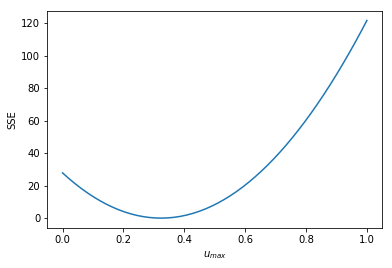

In [13]:
_, k, _lambda = p3
_U = np.linspace(0, 1)

SSE = [sum((f3([Cc, Cs], umax, k, _lambda) - rg)**2) for umax in _U]
plt.plot(_U, SSE)
plt.xlabel('$u_{max}$')
plt.ylabel('SSE')

The lack of minimum in a parameter leads to the confidence intervals being undefined because they are related to the curvature at the minimum.

# An application in catalysis

-   In heterogeneous catalysis molecules often
    -   adsorb on the surface,
    -   react,
    -   and then products desorb
-   Adsorption occurs on a *site*
-   There are a fixed number of sites available
-   These lead to behavior similar to the enzyme rate laws
-   Let us consider the overall reaction:

$A + B \rightarrow P $

-   The reaction takes place on a surface, and is postulated to go through this mechanism:

\begin{align*}
A + S &\rightarrow& A^* \\
A^* &\rightarrow& A + S \\
B + S &\rightarrow& B^* \\
B^* &\rightarrow& B + S \\
A^*  + B^* &\rightarrow& P + 2S
\end{align*}

-   $A^*$ and $B^*$ are adsorbed surface intermediates
-   $S$ is a surface site
-   The total concentration of sites is $C_{S0}$
    -   $C_{S0} = C_S + C_{A*} + C_{B*}$
    -   Sites are not consumed in the reaction, they are regenerated by desorption reactions
-   Let us assume the last reaction is very slow
-   That implies that the reactions before it may reach equilibrium
-   In particular reactions 1 and 2, and reactions 3 and 4 may reach equilibrium
-   That implies the following statements are true:

\begin{align}
0 &=& k_1 C_A C_S - k_2 C_{A^*} (1) \\
0 &=& k_3 C_B C_S - k_4 C_{B^*}
\end{align}

-   It is convenient to take the ratio of these equations:

$ \frac{k_4}{k_2}\frac{C_{B^*}}{C_{A^*}} = \frac{k_3}{k_1}\frac{C_B}{C_A} $

-   And then to solve for $C_{B*}$

\begin{equation}
C_{B^*} = \frac{K_2}{K_1} \frac{C_B}{C_A} C_{A^*}  (2)
\end{equation}

-   where we defined $K_1 = \frac{k_1}{k_2}$, $K_2 = \frac{k_3}{k_4}$
-   Plugging this result back into equation (1) and solving for $C_{A^*}$ leads to (after some algebra)

\begin{align*}
C_{A*} &=& \frac{k_1 C_A C_{S0}}{k_2 + k_1 C_A + k1 K_2/K_1 C_B} \\
       &=& \frac{K_1 C_A C_{S0}}{1 + K_1 C_A + K_2 C_B}
\end{align*}

-   Now plugging this result back into (2)  gives us an expression for $C_{B^*}$

$ C_{B^*} = \frac{K_2 C_B C_{S0}}{1 + K_1 C_A + K_2 C_B} $

-   Finally, we can express the rate of production of products:

$ r_P = k_5 C_{A^*} C_{B^*} = \frac{k_5 K_1 K_2 C_A C_B C_{S0}^2}{(1 + K_1 C_A + K_2 C_B)^2} $

-   This rate law has an important feature
    -   It can show negative reaction order
-   We consider the rate as a function of the concentration of B here.

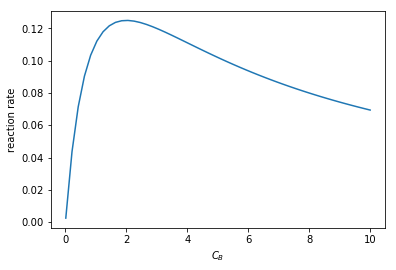

In [1]:
K1 = K2 = k5 = Cs0 = 1.0

C_A = 1.0
C_B = np.linspace(0.01, 10)
r = k5 * K1 * K2 * C_A * C_B * Cs0**2 / (1 + K1 * C_A + K2 * C_B)**2

plt.plot(C_B, r)
plt.xlabel('$C_B$')
plt.ylabel('reaction rate')

-   For a fixed concentration of $A$ the rate initially increases with increasing concentration of $B$

-   The rate reaches a maximum, and then decreases

-   The rate decreases because $A$ and $B$ *compete* for the available sites and the rate is a *product* of the two concentrations
    -   As the concentration of $B$ increases, the fraction of sites covered by $B$ increases, and the fraction covered by $A$ decreases

-   Naturally, by stoichiometry we can get the other species rates:

$ \frac{r_P}{\alpha_P} = \frac{r_A}{\alpha_A} = \frac{r_B}{\alpha_B} = r $

-   The algebra to get here is tedious

-   But, consider the benefits

-   We have an analytical equation for the rate
    -   You can see that there are scenarios where the rate would be first order in A, or B (at low pressures)
    -   Or the rate could be constant at higher pressures
    -   The rate may actually decrease with increasing A (or B) because they compete for the same sites

-   Similar to the enzyme, there is a $C_{S0}$ in the rate
    -   You can increase the rate by increasing the number of sites present

-   In catalysis it is customary to normalize the concentrations of surface species by the total number of sites
    -   $\theta_{A^*} = C_{A^*} / C_{S0}$
    -   These are called fractional coverages

-   It is also common to use other units for reactions that happen on surfaces

-   For example, we do not usually consider the number of sites per unit volume, but per unit of surface area
    -   Then we need to know the surface area per unit volume
    -   Alternatively, we may use the surface area per unit mass, and the bulk density to relate that back to volume if needed